In [1]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
import scipy as sc
from scipy import stats

In [2]:
data = pd.read_csv('data/processed.csv')
data.head()

,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa
0,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,All,14.0,NaN,NaN,3.620000,NaN,NaN
1,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,Asian,8.0,NaN,NaN,3.620000,NaN,NaN
2,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,Hispanic/ Latino,5.0,NaN,NaN,3.620000,NaN,NaN
3,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.12125,4.088571
4,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.12125,4.088571


In [3]:
### check the number of NaN's in applied, admitted and enrolled students' GPA
nan_app_gpa = data['app_gpa'].isnull().sum() / (data['app_gpa'].isnull().sum() + data['app_gpa'].notnull().sum())
nan_adm_gpa = data['adm_gpa'].isnull().sum() / (data['adm_gpa'].isnull().sum() + data['adm_gpa'].notnull().sum())
nan_enr_gpa = data['enr_gpa'].isnull().sum() / (data['enr_gpa'].isnull().sum() + data['enr_gpa'].notnull().sum())

print('NaN app = %0.2f\nNaN adm = %0.2f\nNaN enr = %0.2f' %(nan_app_gpa, nan_adm_gpa, nan_enr_gpa))

NaN app = 0.00
NaN adm = 0.30
NaN enr = 0.74


In [4]:
data['yield'] = data['enr_num'] / data['adm_num']
data_valid_adm = data[data['adm_gpa'].notnull()]
data_valid_adm.head()

,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,yield
3,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000
4,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000
8,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,All,61.0,30.0,13.0,3.557869,3.828333,3.563846,0.433333
9,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,Asian,16.0,4.0,NaN,3.557869,3.828333,NaN,NaN
10,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,Hispanic/ Latino,6.0,4.0,NaN,3.557869,3.828333,NaN,NaN


In [5]:
data_valid_adm['adm_rate'] = data_valid_adm['adm_num'] / data_valid_adm['app_num']
data_valid_yield = data_valid_adm[data_valid_adm['yield'].notnull()]
data_valid_yield['adm_app_gpa_diff'] = data_valid_adm['adm_gpa'] - data_valid_adm['app_gpa']
data_valid_yield.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,yield,adm_rate,adm_app_gpa_diff
3,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000,0.137931,0.438319
4,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000,0.160000,0.438319
8,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,All,61.0,30.0,13.0,3.557869,3.828333,3.563846,0.433333,0.491803,0.270464
11,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,White,29.0,17.0,7.0,3.557869,3.828333,3.563846,0.411765,0.586207,0.270464
12,Berkeley,1994,ADOLFO CAMARILLO HIGH SCHOOL,50438,Camarillo,Ventura,California,USA,Ventura,All,32.0,15.0,6.0,4.008438,4.143333,3.966667,0.400000,0.468750,0.134896


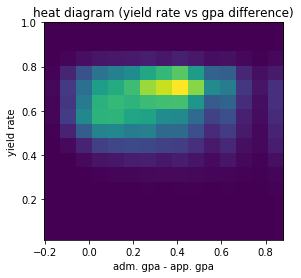

In [28]:
y, x = data_valid_yield['yield'], data_valid_yield['adm_app_gpa_diff']
heatmap, xedges, yedges =  np.histogram2d(x, y, bins=(15,15))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap, extent=extent)
plt.xlabel('adm. gpa - app. gpa')
plt.ylabel('yield rate')
plt.title('heat diagram (yield rate vs gpa difference)')
plt.show()

-0.04265997152316724

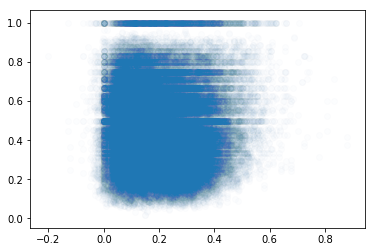

In [31]:
plt.scatter(x,y, alpha=.01)
y.corr(x)

### Baseline Model

In [8]:
### Our Baseline Model

yield_baseline = data_valid_adm['yield'].mean()
yield_baseline

0.4758632319483024

Text(0.5,1,'adm_app_gpa_diff vs adm_rate')

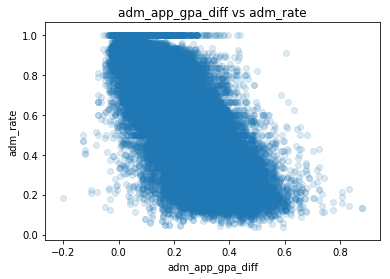

In [9]:
adm_app_gpa_diff, adm_rate = data_valid_yield['adm_app_gpa_diff'], data_valid_yield['adm_rate']
plt.scatter(adm_app_gpa_diff, adm_rate, alpha=0.15)
plt.xlabel('adm_app_gpa_diff')
plt.ylabel('adm_rate')
plt.title('adm_app_gpa_diff vs adm_rate')

### Yield Rate vs Year

Unfortunately, by doing correlation analysis between various GPA related variables and yield rate, we were unable to find significant correlation between GPA variables and yield rate, which we previously assumed to have great influence on our prediction. Next, we want to check if there would be any correlation between the yield rate and year. Specifically, we are interested to see how the yield rate changes with respect to different years. In this plot, we took all nine of the UC campuses into account and calculate the average yield rate for each year. The plot shows us some sorts of trend of the yield rate. Before 2010, it had been gradually decreasing, but after 2010, the tendency began to rise up and finally fell after a short period of time. After examining this plot, we would like to look closely into the cause factors of the change in yield rate. 

In [10]:
def find_yield(yr):
    return data[data['year'] == yr]['yield'].mean()

(0.4, 0.55)

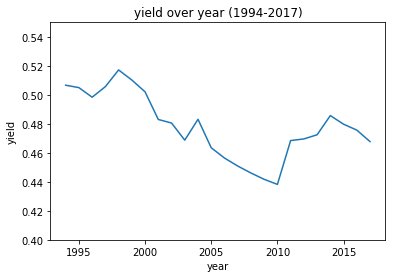

In [11]:
### check the yield over the years in overall

yield_yr = []
yr = np.arange(1994, 2018)

for y in yr:
    yield_yr.append(find_yield(y))
    
plt.plot(yr, yield_yr)
plt.xlabel('year')
plt.ylabel('yield')
plt.title('yield over year (1994-2017)')
plt.ylim(0.40, 0.55)

## Yield Rate vs Year for various races



In [12]:
def find_yield_race(race, yr):
    return data[(data['ethnicity'] == race) & (data['year'] == yr)]['yield'].mean()

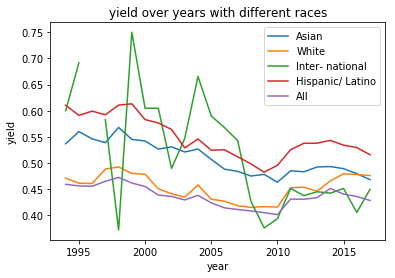

In [13]:
### check the yield for different races 

race = ['Asian', 'White', 'Inter- national', 'Hispanic/ Latino', 'All']
yield_race_yr = [[], [], [], [], []]

for i in range(0, len(race)):
    for y in yr:
        yield_race_yr[i].append(find_yield_race(race[i], y))

for i in range(0, len(race)):
    plt.plot(yr, yield_race_yr[i], label=race[i])

plt.xlabel('year')
plt.ylabel('yield')
plt.title('yield over years with different races')
plt.legend(bbox_to_anchor=(1., 1.0))

### Yield Rate over Year for different campuses 

In [14]:
def find_yield_campus(camp, yr):
    return data[(data['campus'] == camp) & (data['year'] == yr)]['yield'].mean()

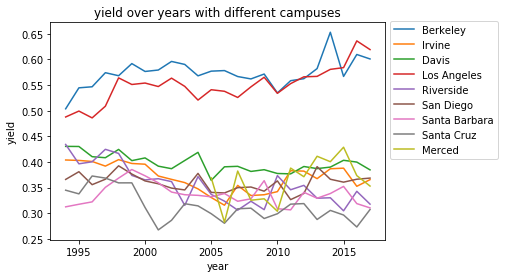

In [15]:
campus = ['Berkeley', 'Irvine', 'Davis', 'Los Angeles', 'Riverside', 'San Diego',
               'Santa Barbara', 'Santa Cruz', 'Merced']

yield_camp_yr = [[], [], [], [], [], [], [], [], []]

yr_reduced = np.arange(1994, 2018)

for i in range(0, len(campus)):
    for y in yr_reduced:
        yield_camp_yr[i].append(find_yield_campus(campus[i], y))

for i in range(0, len(campus)):
    plt.plot(yr_reduced, yield_camp_yr[i], label=campus[i])

plt.xlabel('year')
plt.ylabel('yield')
plt.title('yield over years with different campuses')
plt.legend(bbox_to_anchor=(1.0, 1.03))

### Yield Rate Distributions for different campuses 

In [32]:
def plot_probs(camp1_values, camp2_values, camp1, camp2):
    fig = plt.figure()
    # add the first subplot
    ax = fig.add_subplot(111)
    # extract the data from the dataframe
    # return the same shape of the data and but all the elements in 
    # the array are 1
    weights = np.ones_like(camp1_values)/len(camp1_values)
    # this is the histogram
    _ = ax.hist(camp1_values, alpha=0.3, label=[camp1], weights=weights)
    weights = np.ones_like(camp2_values)/len(camp2_values)
    _ = ax.hist(camp2_values, color='red', alpha=.3, label=camp2, weights=weights)
    ax.set_xlabel('yield rate', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.vlines(np.mean(camp1_values), 0.0, ax.get_ylim()[1], colors='b', linestyle='--', linewidth=4)
    ax.vlines(np.mean(camp2_values), 0.0, ax.get_ylim()[1], colors='r', linestyle='--', linewidth=4)
    ax.legend()
    
from scipy.stats import ttest_ind as ttest
from scipy.stats import normaltest

In [34]:
camp_yield = {}

for c in campus:
    camp_values = data[data['campus']==c]['yield'].values
    camp_values = camp_values[~np.isnan(camp_values)]
    camp_yield[c] = camp_values

Let's look at the distribution of yield rates for the Berkeley and LA campuses. On the plot above they seemed to have a similar rate. Let's see if the distributions are normal, and then do a T-test to see if they are the same distribution...

NormaltestResult(statistic=203.65430081922023, pvalue=5.984535798133254e-45)
NormaltestResult(statistic=282.51165822006334, pvalue=4.501661971532998e-62)
Ttest_indResult(statistic=0.0, pvalue=1.0)


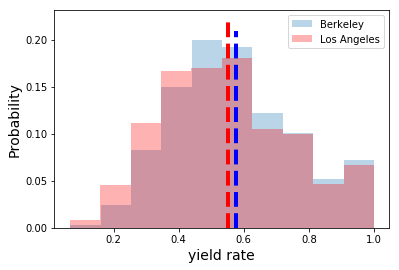

In [38]:
print(normaltest(camp_yield['Berkeley']))
print(normaltest(camp_yield['Los Angeles']))
print(ttest(camp_yield['Berkeley'], camp_yield['Berkeley']))
plot_probs(camp_yield['Berkeley'], camp_yield['Los Angeles'], 'Berkeley', 'Los Angeles')

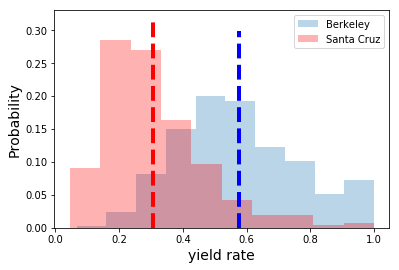

In [19]:
plot_probs(camp_yield['Berkeley'], camp_yield['Santa Cruz'], 'Berkeley', 'Santa Cruz')

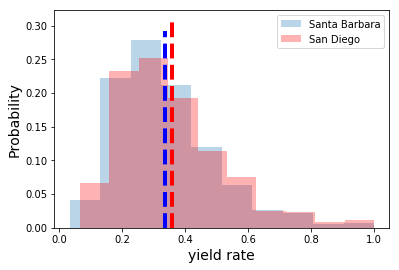

In [20]:
plot_probs(camp_yield['Santa Barbara'], camp_yield['San Diego'], 'Santa Barbara', 'San Diego')

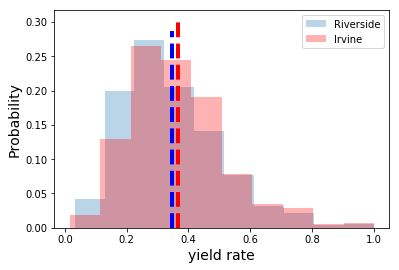

In [21]:
plot_probs(camp_yield['Riverside'], camp_yield['Irvine'], 'Riverside', 'Irvine')

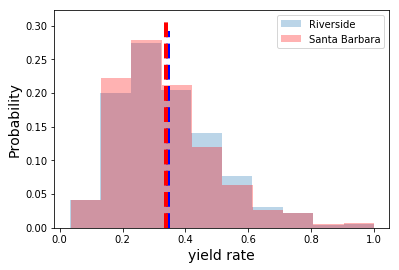

In [22]:
plot_probs(camp_yield['Riverside'], camp_yield['Santa Barbara'], 'Riverside', 'Santa Barbara')

In [23]:
yield_ucb_ucla = np.append(camp_yield['Berkeley'], camp_yield['Los Angeles'])
yield_rest = np.array([])
yield_all = np.array([])

for c in campus:
    yield_all = np.append(yield_all, camp_yield[c])
    if c != 'Berkeley' and c != 'Los Angeles':
        yield_rest = np.append(yield_rest, camp_yield[c])

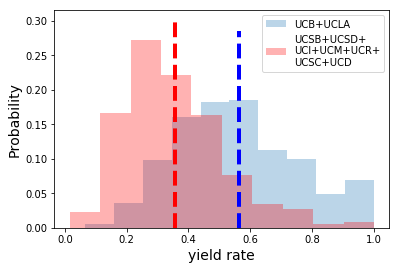

In [24]:
plot_probs(yield_ucb_ucla, yield_rest, 'UCB+UCLA', 'UCSB+UCSD+\nUCI+UCM+UCR+\nUCSC+UCD')

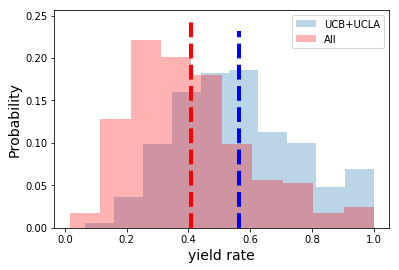

In [25]:
plot_probs(yield_ucb_ucla, yield_all, 'UCB+UCLA', 'All')

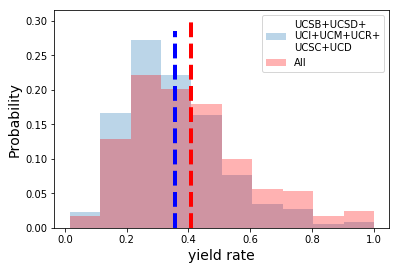

In [26]:
plot_probs(yield_rest, yield_all, 'UCSB+UCSD+\nUCI+UCM+UCR+\nUCSC+UCD', 'All')